# Dataset Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Target

Here the target is quality which rates the wine from 1 to 10 on the different parameters. We need to predict the quality using the best machine learning model.

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset

df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

Dataset has 1599 rows and 12 columns

In [4]:
# columns name

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()  #provide the the info of every column in short form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()  #checking the null value in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

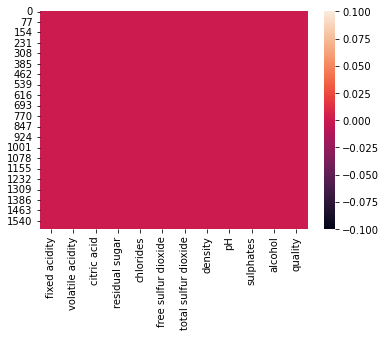

In [7]:
sns.heatmap(df.isnull())  # plotting the null value using heatmap

In [8]:
df['quality'].value_counts() #counting the different variables in the target 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:ylabel='Frequency'>

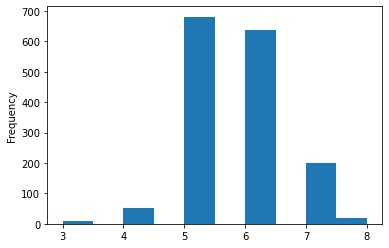

In [9]:
df['quality'].plot.hist()  #plotting the counts in target column

from the above graph we get to know that the dataset is imbalanced and we have to balanced it

In [10]:
#separating the dependent and independent variable for balancing the class

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
# importing smote for balancing the dataset

from imblearn.over_sampling import SMOTE
smt=SMOTE()
train_x,train_y=smt.fit_resample(x,y)
train_y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [12]:
train_y.shape

(4086,)

<AxesSubplot:xlabel='quality', ylabel='count'>

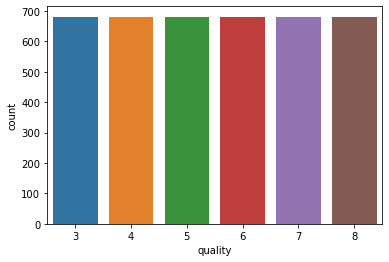

In [13]:
sns.countplot(train_y)

Now we can say that the data is balanced and we can go with the further EDA and learning

In [14]:
x=train_x
y=train_y

In [15]:
# Creating the dataframe with our balanced datadset

df_new=pd.DataFrame(data=x)
df_new['quality']=y
df=df_new
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,7.266625,0.373338,0.306669,1.933375,0.061996,15.666249,27.334376,0.994543,3.233331,0.740013,11.333312,8
4082,9.186461,0.452704,0.427296,2.545945,0.073243,6.621649,16.540550,0.994578,3.177027,0.687838,12.135154,8
4083,7.213699,0.378630,0.309315,1.986301,0.057233,15.136991,28.657523,0.994684,3.230685,0.755890,11.306850,8
4084,7.012445,0.401774,0.300980,2.934334,0.065426,19.807589,55.490726,0.994896,3.405472,0.845207,13.243777,8


## statistical summary

In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,8.369682,0.583895,0.272814,2.606933,0.089311,13.451054,36.739733,0.996531,3.326788,0.659670,10.713882,5.500000
std,1.652610,0.248073,0.203210,1.220070,0.046914,9.698965,28.251674,0.001892,0.155362,0.162203,1.180121,1.708034
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.384116,0.076990,1.950101,0.069824,5.884154,15.675061,0.995380,3.218798,0.550000,9.763093,4.000000
50%,8.000377,0.540000,0.262473,2.226601,0.078922,10.843229,27.675307,0.996550,3.320000,0.630000,10.553526,5.500000
75%,9.400000,0.718381,0.443070,2.787169,0.092000,18.000000,48.000000,0.997716,3.423283,0.746218,11.480548,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations

1. outliers present in residual sugar, free sulfur dioxide, total sulfur dioxide columns
2. skewness present in the dataset

## correlation

In [17]:
corr=df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.313407,0.723194,0.096638,0.092779,-0.133239,-0.121787,0.648827,-0.715528,0.207321,-0.134954,0.170693
volatile acidity,-0.313407,1.000000,-0.642945,0.080407,0.197116,-0.171351,-0.117971,0.089373,0.468331,-0.457712,-0.272597,-0.693161
citric acid,0.723194,-0.642945,1.000000,0.075726,0.117702,0.004513,0.052072,0.304735,-0.682883,0.450689,0.137302,0.461793
residual sugar,0.096638,0.080407,0.075726,1.000000,0.007535,-0.007760,0.080557,0.321598,-0.013688,-0.037016,0.083704,-0.050180
chlorides,0.092779,0.197116,0.117702,0.007535,1.000000,0.014355,-0.013023,0.261898,-0.188241,0.259303,-0.334682,-0.330036
free sulfur dioxide,-0.133239,-0.171351,0.004513,-0.007760,0.014355,1.000000,0.719501,-0.110008,0.040534,0.177658,0.023185,0.107515
total sulfur dioxide,-0.121787,-0.117971,0.052072,0.080557,-0.013023,0.719501,1.000000,-0.010689,-0.032197,0.133024,-0.082945,0.038849
density,0.648827,0.089373,0.304735,0.321598,0.261898,-0.110008,-0.010689,1.000000,-0.323166,0.035392,-0.590924,-0.329650
pH,-0.715528,0.468331,-0.682883,-0.013688,-0.188241,0.040534,-0.032197,-0.323166,1.000000,-0.317848,0.159605,-0.319910
sulphates,0.207321,-0.457712,0.450689,-0.037016,0.259303,0.177658,0.133024,0.035392,-0.317848,1.000000,0.223502,0.443053


<AxesSubplot:>

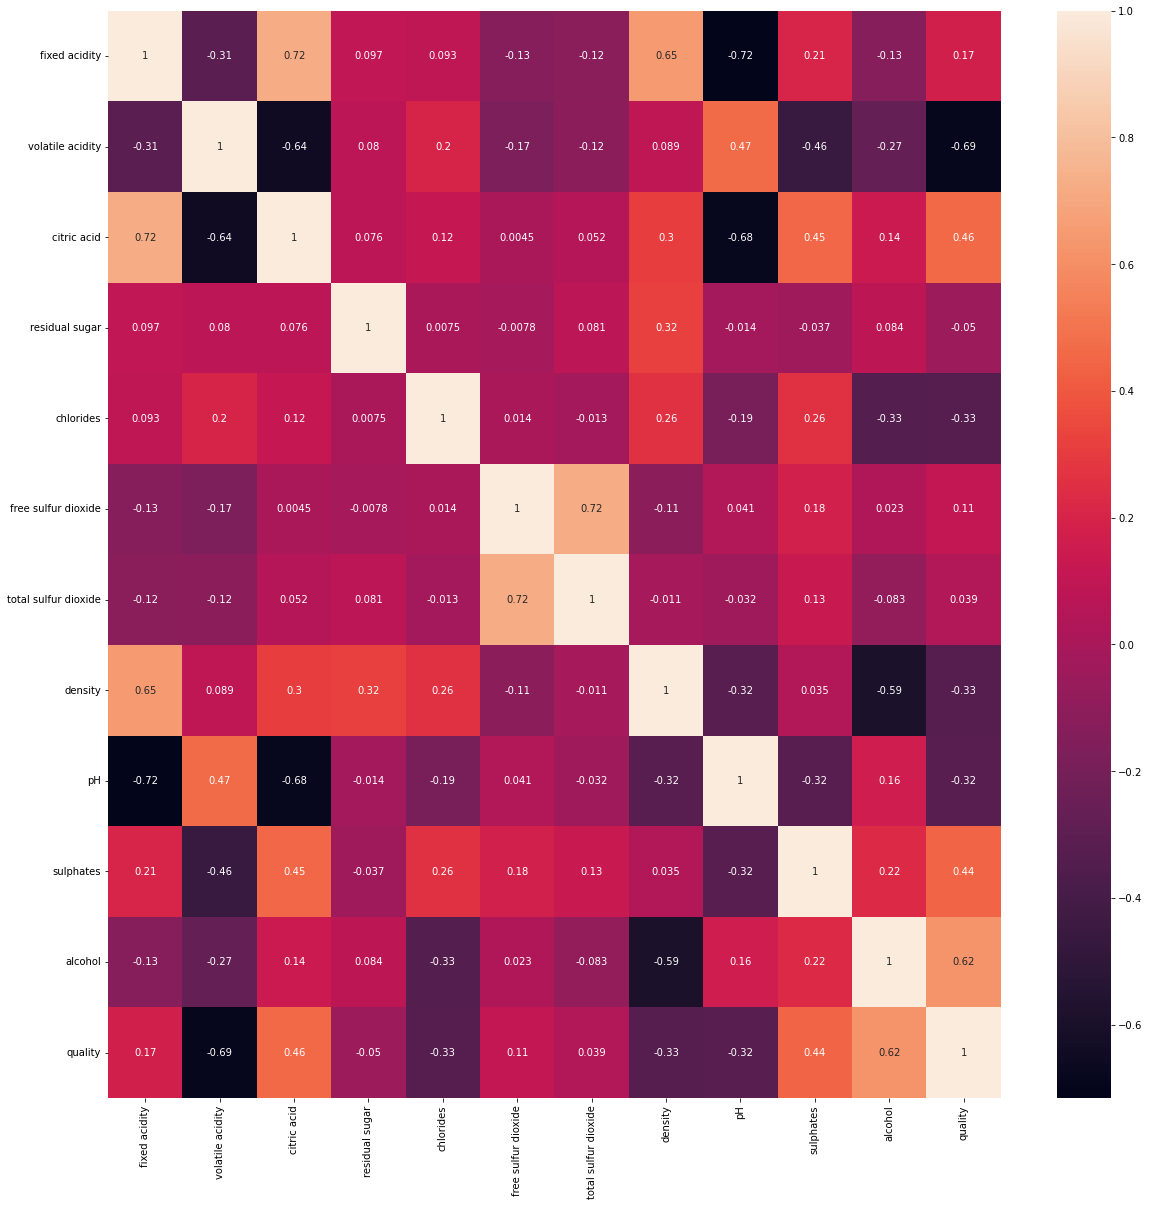

In [18]:
# plotting the correlation

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [19]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.621128
citric acid             0.461793
sulphates               0.443053
fixed acidity           0.170693
free sulfur dioxide     0.107515
total sulfur dioxide    0.038849
residual sugar         -0.050180
pH                     -0.319910
density                -0.329650
chlorides              -0.330036
volatile acidity       -0.693161
Name: quality, dtype: float64

there are columns which are highly negatively correlated

### Data visualization

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

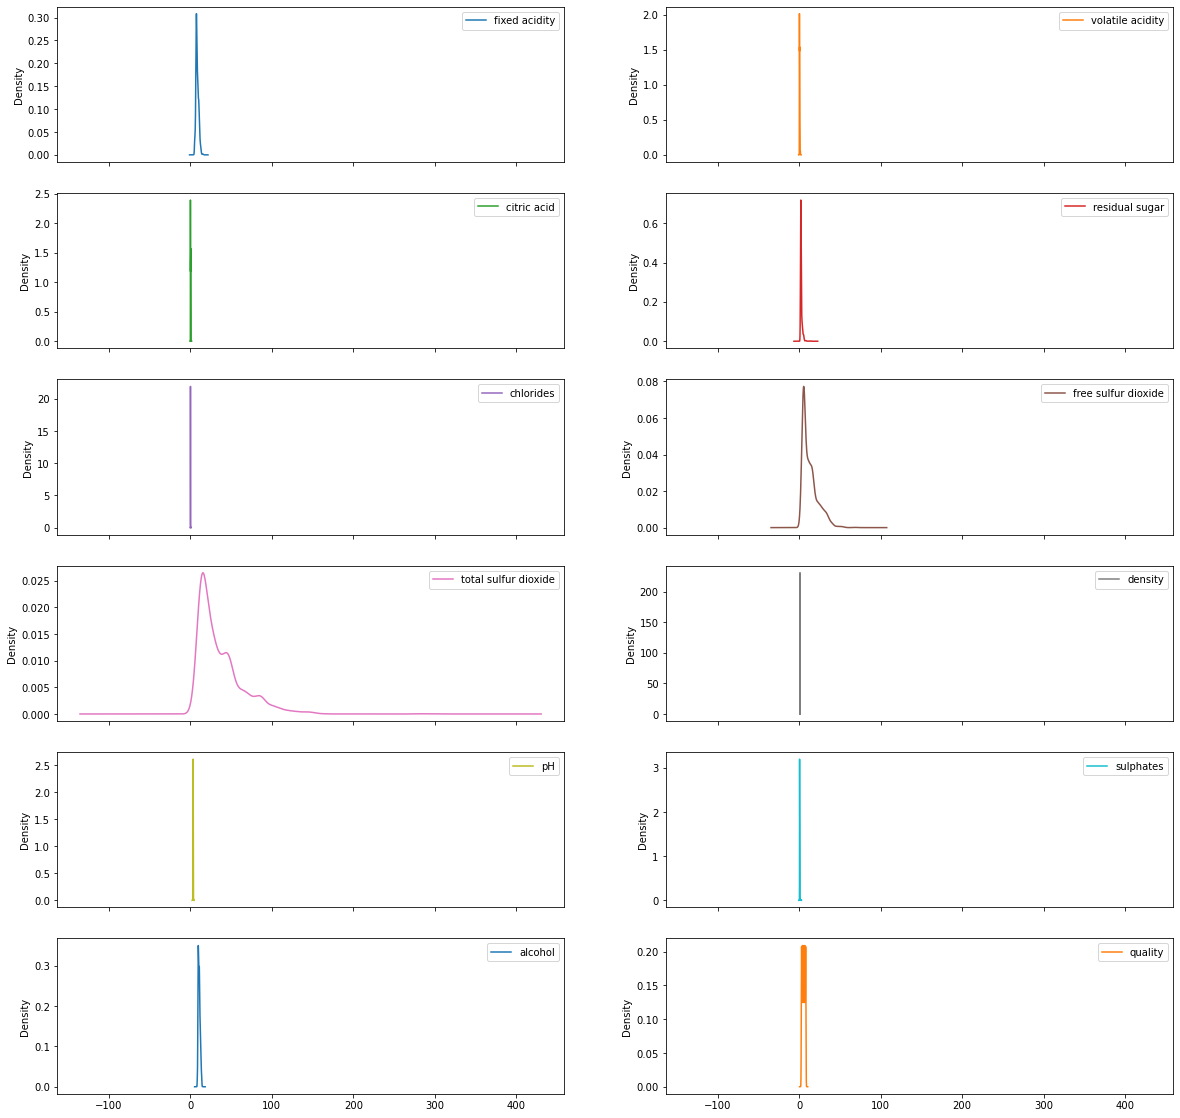

In [20]:
df.plot(kind='density',subplots=True, layout=(6,2),figsize=(20,20))

Here we are not getting such information but yes we grt to know that free and total sulfur dioxide column has skewness so we plot the rest columns to see the skewness

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

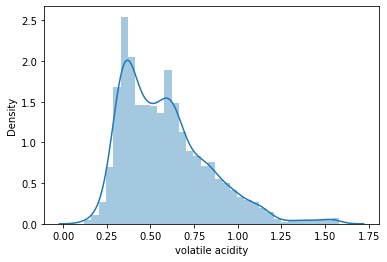

In [21]:
sns.distplot(df['volatile acidity'])

this shows little skewness

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

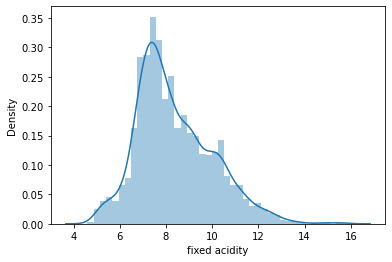

In [22]:
sns.distplot(df['fixed acidity'])

this column also has little skewness

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

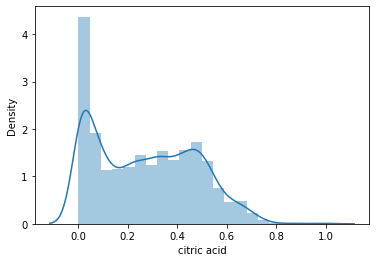

In [23]:
sns.distplot(df['citric acid'])

this graph shows bimodality

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

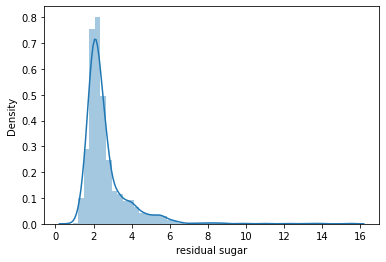

In [24]:
sns.distplot(df['residual sugar'])

it is left skewed column

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

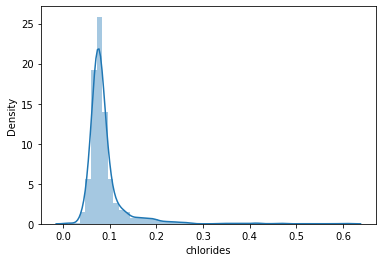

In [25]:
sns.distplot(df['chlorides'])

it is also left skewed column

<AxesSubplot:xlabel='density', ylabel='Density'>

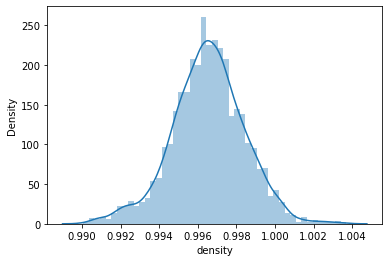

In [26]:
sns.distplot(df['density'])

it looks normalized graph

<AxesSubplot:xlabel='pH', ylabel='Density'>

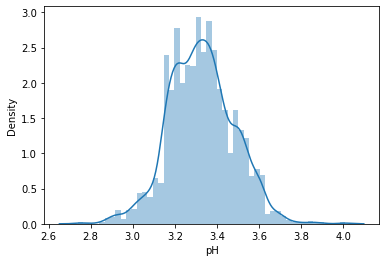

In [27]:
sns.distplot(df['pH'])

it also look normal data

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

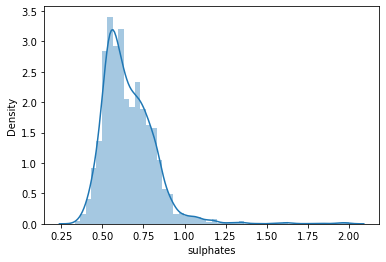

In [28]:
sns.distplot(df['sulphates'])

it shows lef skewness

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

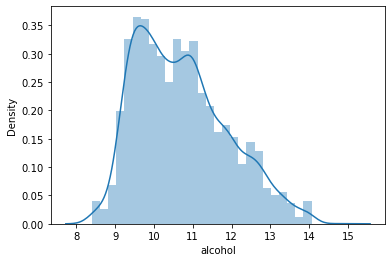

In [29]:
sns.distplot(df['alcohol'])

it shows skewness

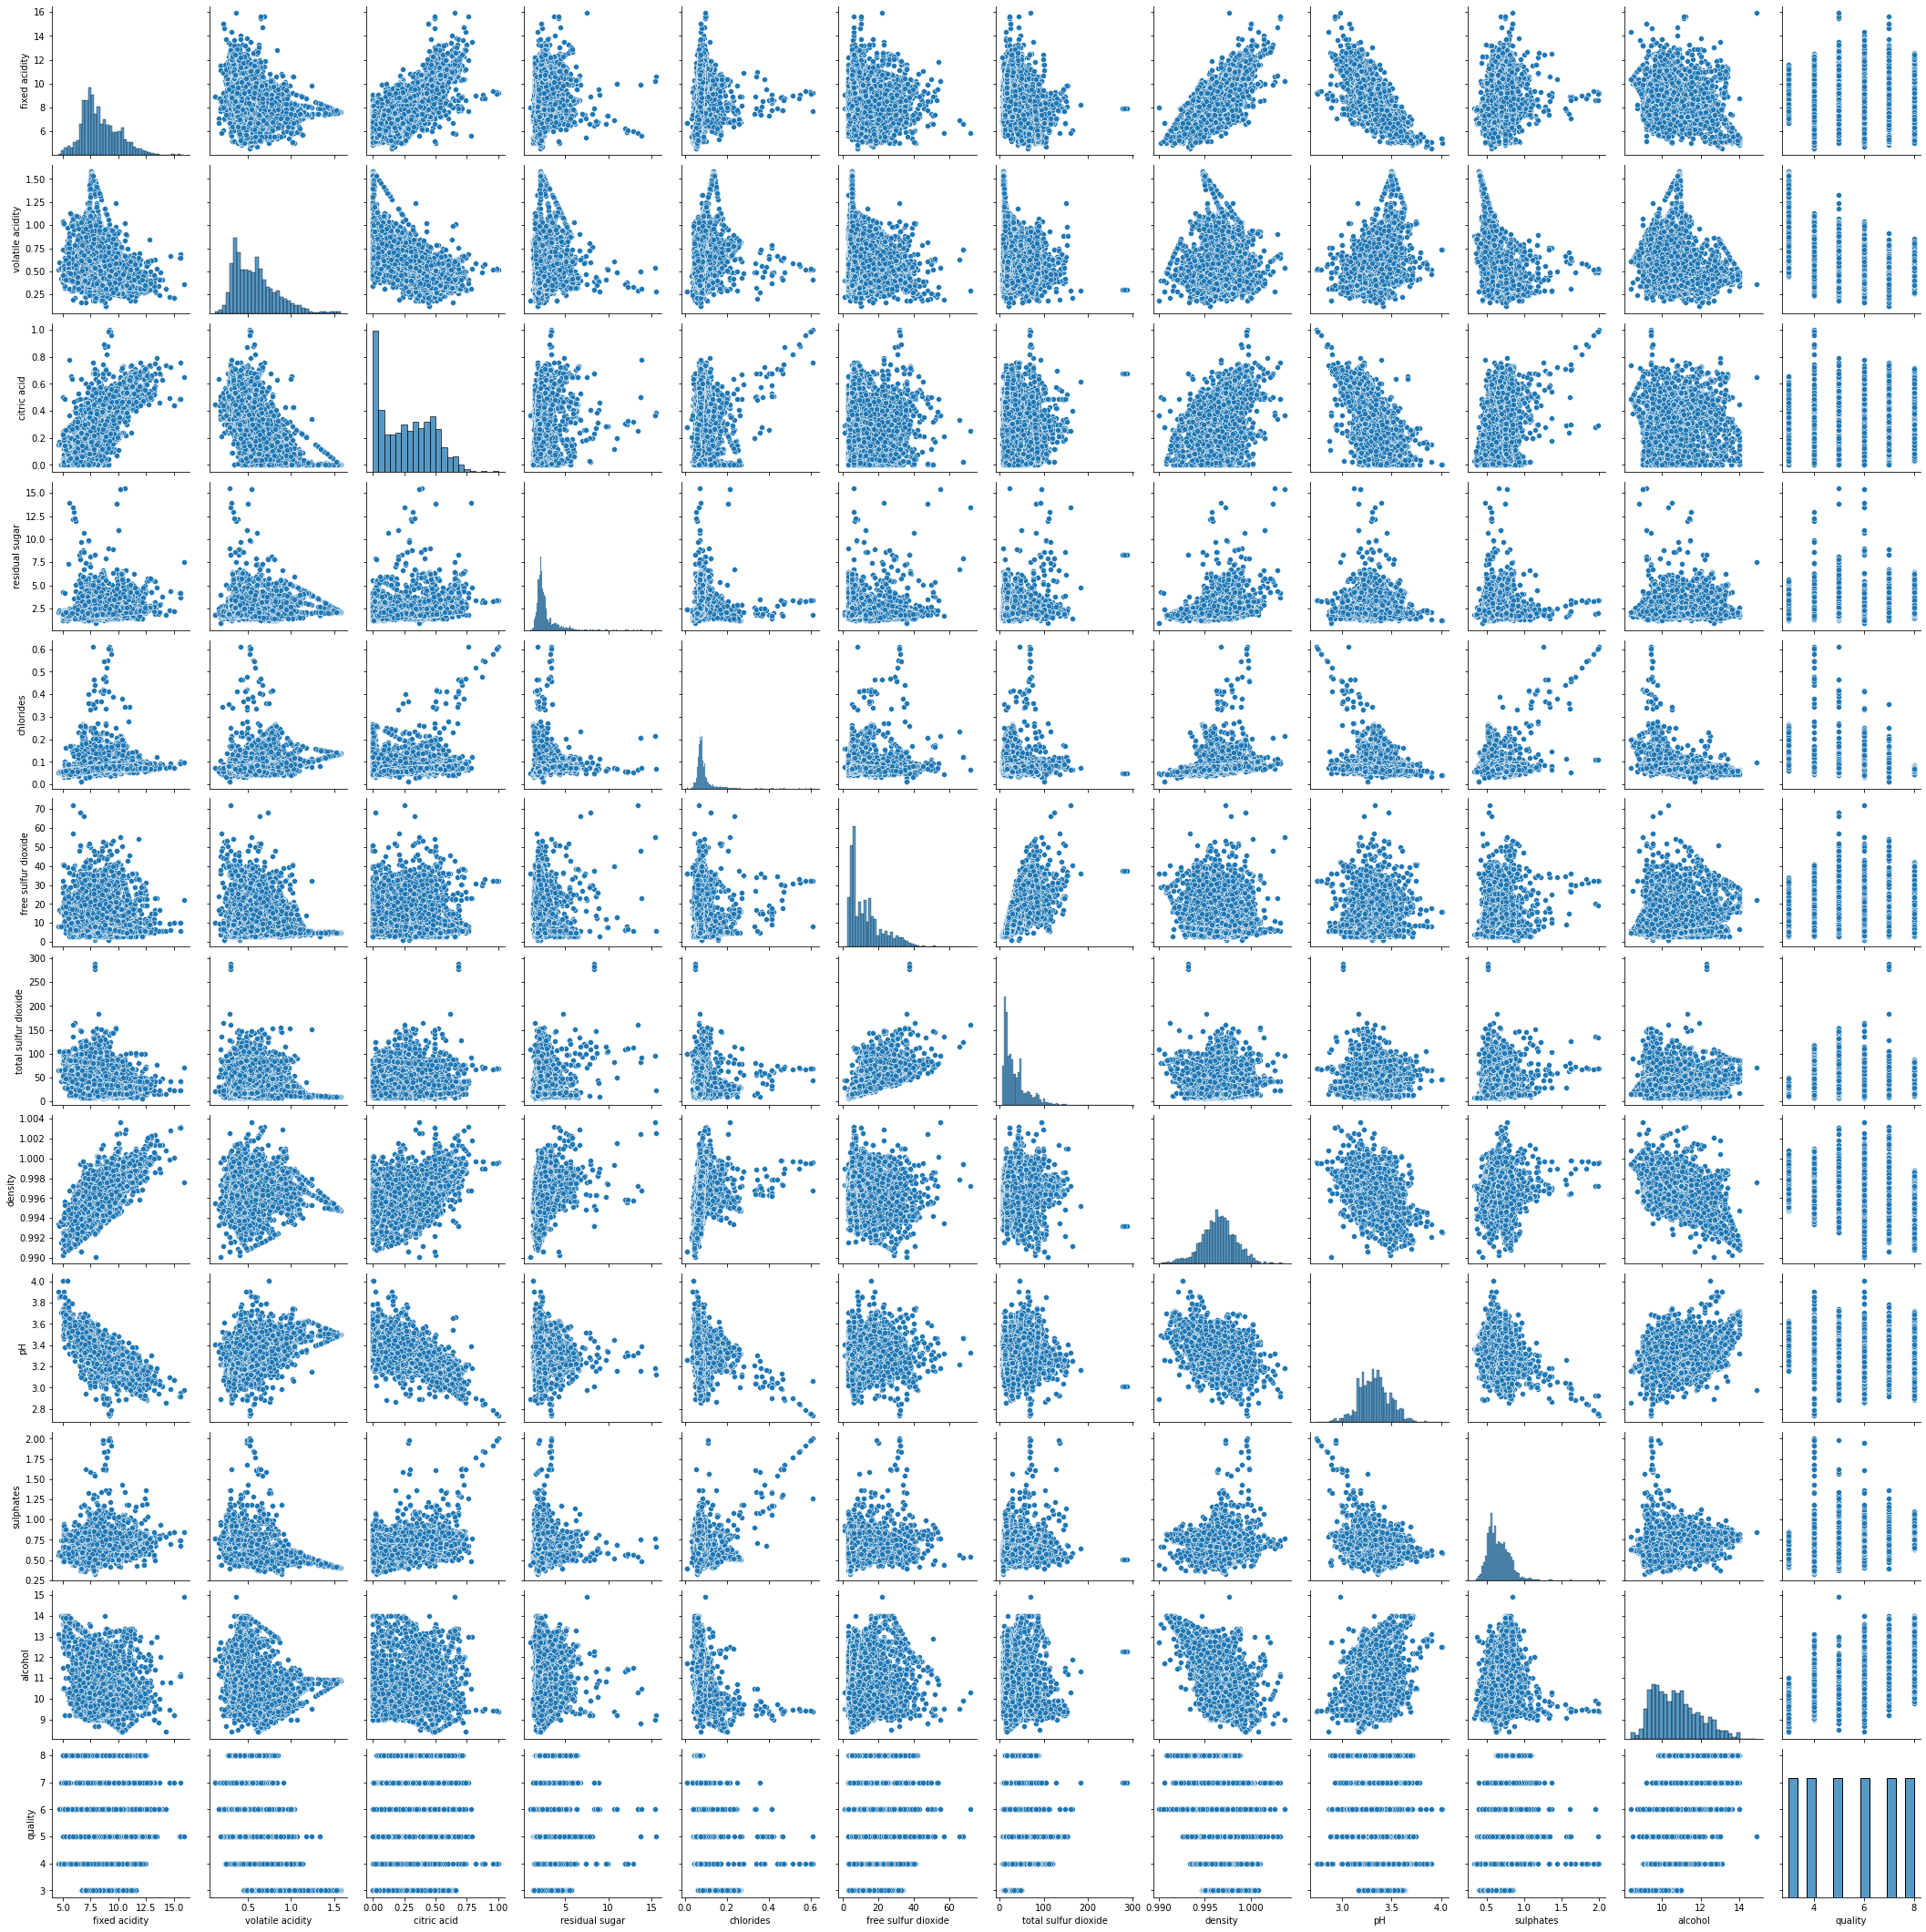

In [30]:
sns.pairplot(df)

### Skewness

In [31]:
x.skew()

fixed acidity           0.713570
volatile acidity        1.034671
citric acid             0.272228
residual sugar          3.717506
chlorides               5.089358
free sulfur dioxide     1.375280
total sulfur dioxide    1.842180
density                -0.111734
pH                      0.101396
sulphates               2.185507
alcohol                 0.566273
quality                 0.000000
dtype: float64

In [32]:
#removing the skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew()

fixed acidity           0.003626
volatile acidity        0.059341
citric acid             0.018377
residual sugar          0.044942
chlorides              -0.073886
free sulfur dioxide     0.045847
total sulfur dioxide    0.045563
density                 0.005973
pH                      0.001027
sulphates              -0.003751
alcohol                 0.045192
quality                -0.084322
dtype: float64

### checking outliers

fixed acidity              AxesSubplot(0.125,0.772143;0.352273x0.107857)
volatile acidity        AxesSubplot(0.547727,0.772143;0.352273x0.107857)
citric acid                AxesSubplot(0.125,0.642714;0.352273x0.107857)
residual sugar          AxesSubplot(0.547727,0.642714;0.352273x0.107857)
chlorides                  AxesSubplot(0.125,0.513286;0.352273x0.107857)
free sulfur dioxide     AxesSubplot(0.547727,0.513286;0.352273x0.107857)
total sulfur dioxide       AxesSubplot(0.125,0.383857;0.352273x0.107857)
density                 AxesSubplot(0.547727,0.383857;0.352273x0.107857)
pH                         AxesSubplot(0.125,0.254429;0.352273x0.107857)
sulphates               AxesSubplot(0.547727,0.254429;0.352273x0.107857)
alcohol                       AxesSubplot(0.125,0.125;0.352273x0.107857)
quality                    AxesSubplot(0.547727,0.125;0.352273x0.107857)
dtype: object

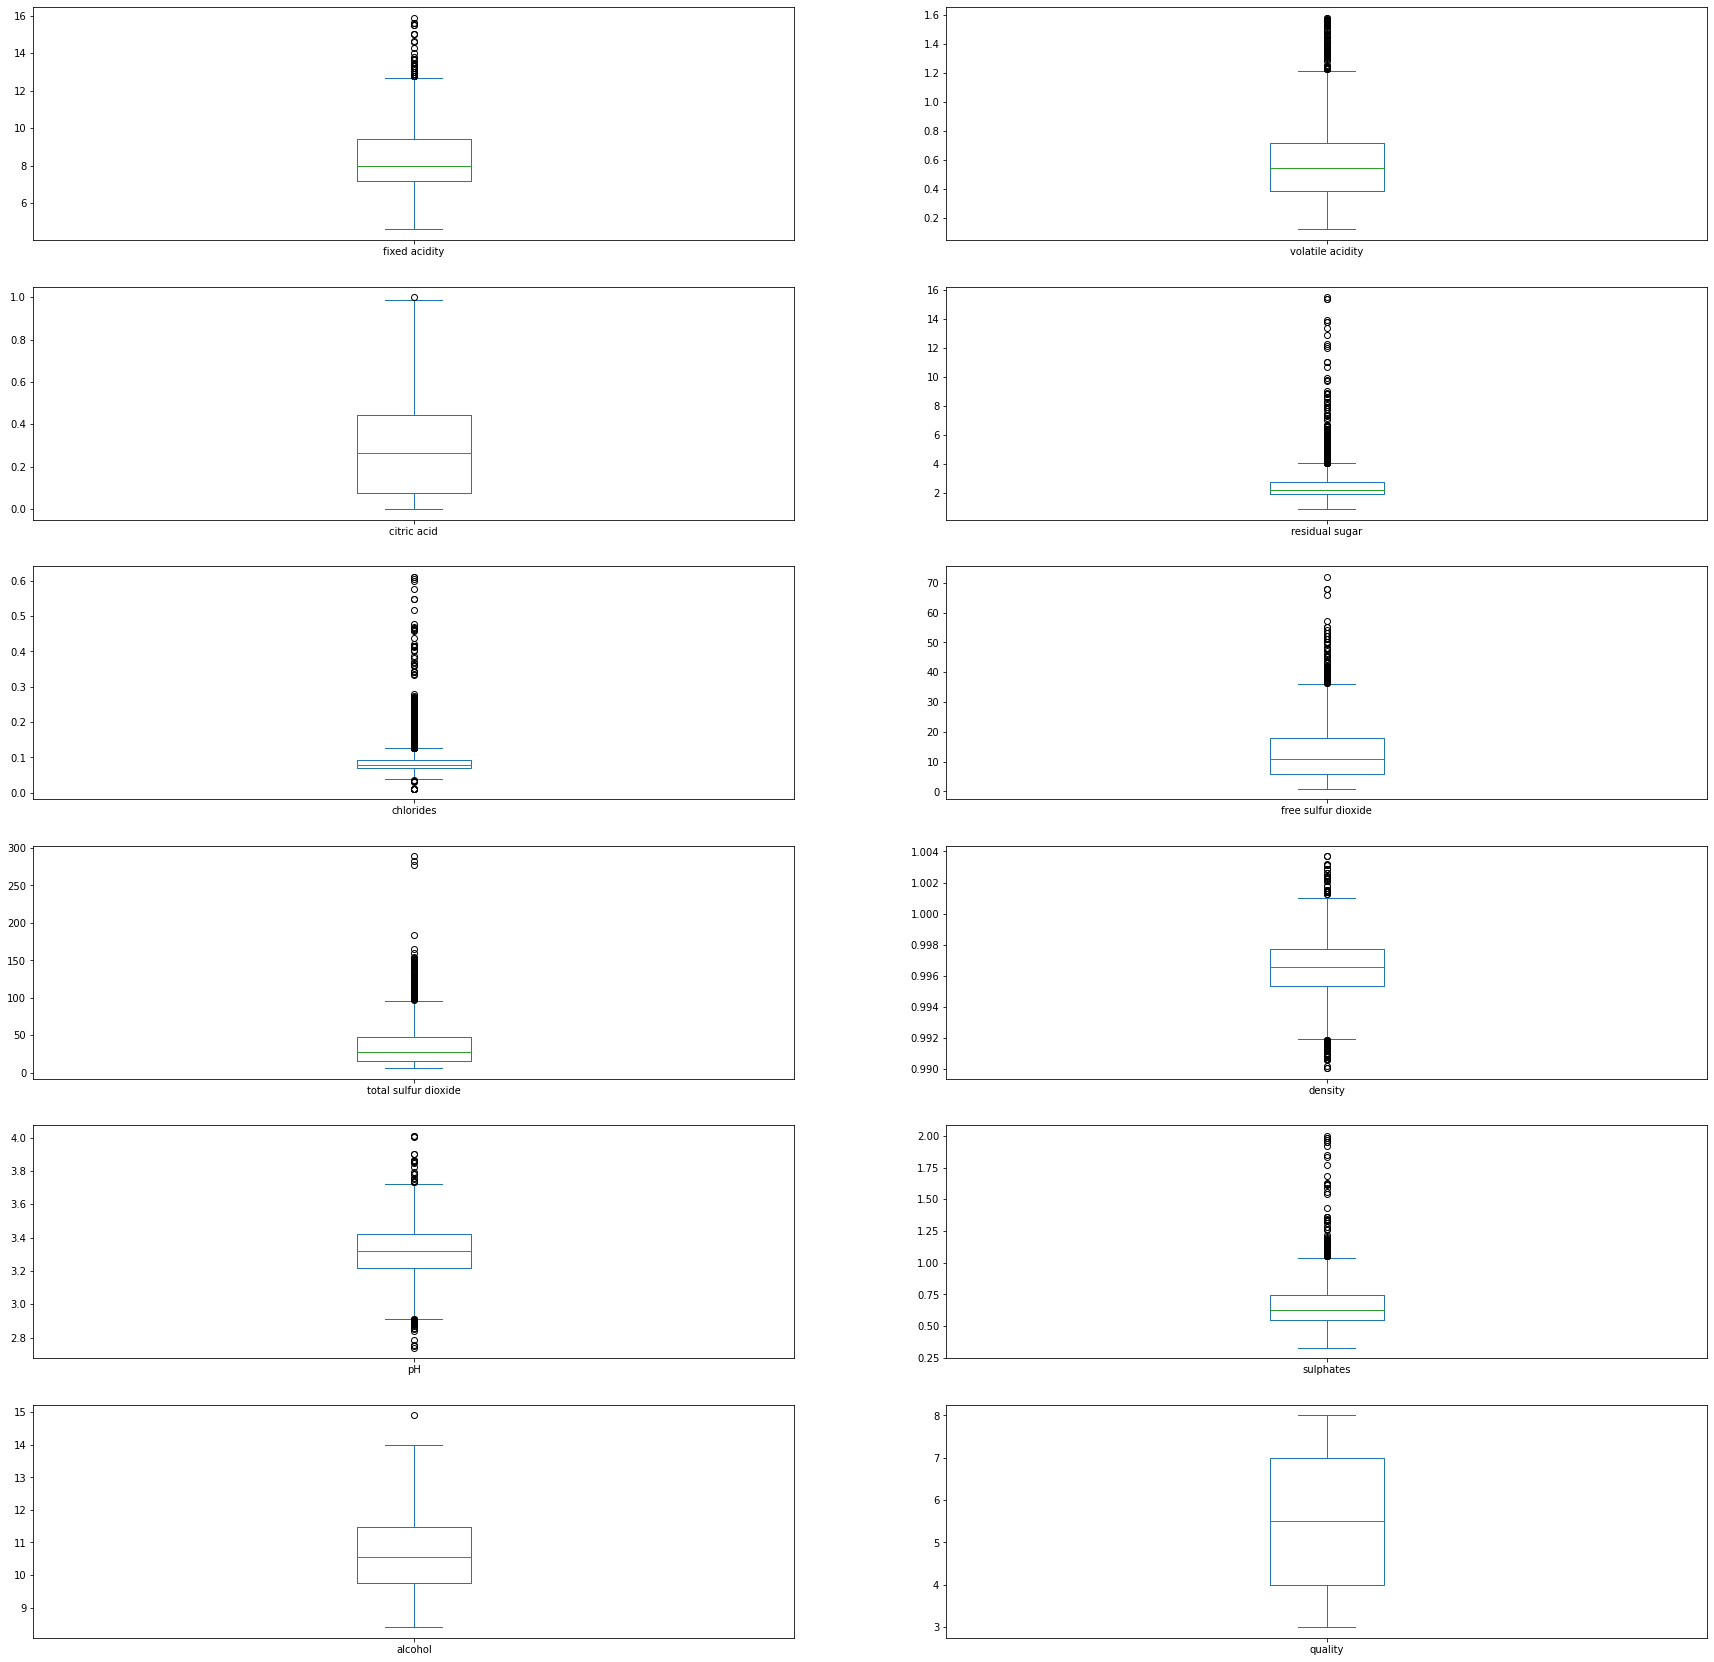

In [33]:
df.plot(kind='box',subplots=True,layout=(6,2),figsize=(30,30))

In [34]:
#removing the outliers from the data

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([  13,   14,   14,   15,   15,   17,   17,   19,   33,   42,   43,
         45,   57,   81,   81,   83,   86,   86,   88,   88,   90,   91,
         91,   92,   92,   95,  106,  106,  109,  126,  127,  130,  145,
        147,  151,  151,  151,  151,  154,  155,  156,  157,  163,  164,
        169,  169,  181,  188,  189,  190,  192,  201,  219,  226,  226,
        240,  243,  244,  258,  258,  274,  278,  281,  291,  313,  324,
        325,  328,  339,  340,  347,  353,  354,  374,  381,  391,  396,
        396,  396,  400,  400,  400,  413,  414,  415,  415,  417,  442,
        442,  451,  463,  480,  480,  494,  497,  501,  502,  515,  522,
        522,  523,  541,  544,  544,  554,  554,  555,  555,  557,  557,
        568,  584,  591,  595,  608,  614,  634,  636,  637,  639,  649,
        649,  651,  652,  652,  652,  672,  678,  684,  692,  692,  693,
        694,  695,  723,  723,  730,  741,  754,  771,  772,  776,  777,
        791,  795,  836,  837,  852,  889,  889,  

(3762, 12)

Setting a cutoff for the target value: greater than 6 is 1 or good and less than 6 is 0 or bad quality wine

In [35]:
df['cut off quality']=df.quality.map(lambda x:1 if x>6 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cut off quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [36]:
#separating the variables after setting the cutoff

x=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [37]:
#scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.60404426,  0.54419799, -1.35998962, ...,  1.21141059,
        -0.71059316, -1.13194025],
       [-0.35512885,  1.3303697 , -1.35998962, ..., -0.87910681,
         0.21119281, -0.79309216],
       [-0.35512885,  0.80625523, -1.15817777, ..., -0.47449054,
        -0.01925368, -0.79309216],
       ...,
       [-0.71997718, -0.85942382,  0.20059648, ..., -0.67217962,
         0.79414774,  0.48339057],
       [-0.84521519, -0.75833987,  0.15854248, ...,  0.50651629,
         1.48024182,  2.12420135],
       [ 1.47568286, -0.98833684,  1.33523925, ..., -1.25659557,
         0.00965571,  0.20094772]])

In [38]:
#importing the different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

### Finding the best random state

In [40]:
model=[lg,rdc,svc,dtc,knc]
maxAcc=0
maxRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)
    

Best Accuracy score is 0.9202834366696191 on random state 56


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,test_size=.30)

### Logistic regression

In [42]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.9193976970770593
Confusion Matrix:  
 [[673  59]
 [ 32 365]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       732
           1       0.86      0.92      0.89       397

    accuracy                           0.92      1129
   macro avg       0.91      0.92      0.91      1129
weighted avg       0.92      0.92      0.92      1129



### Decision tree classifier

In [43]:
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.9282550930026572
Confusion Matrix:  
 [[686  46]
 [ 35 362]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       732
           1       0.89      0.91      0.90       397

    accuracy                           0.93      1129
   macro avg       0.92      0.92      0.92      1129
weighted avg       0.93      0.93      0.93      1129



### Support vector classifier

In [44]:
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.9450841452612931
Confusion Matrix:  
 [[695  37]
 [ 25 372]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       732
           1       0.91      0.94      0.92       397

    accuracy                           0.95      1129
   macro avg       0.94      0.94      0.94      1129
weighted avg       0.95      0.95      0.95      1129



### Random forest classifier

In [45]:
rdc.fit(x_train,y_train)
pred=rdc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.9645704162976085
Confusion Matrix:  
 [[712  20]
 [ 20 377]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       732
           1       0.95      0.95      0.95       397

    accuracy                           0.96      1129
   macro avg       0.96      0.96      0.96      1129
weighted avg       0.96      0.96      0.96      1129



### Kneigbor classifier

In [46]:
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report: ','\n',classification_report(y_test,pred))

Accuracy Score:  0.9379982285208148
Confusion Matrix:  
 [[673  59]
 [ 11 386]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       732
           1       0.87      0.97      0.92       397

    accuracy                           0.94      1129
   macro avg       0.93      0.95      0.93      1129
weighted avg       0.94      0.94      0.94      1129



### Cross Val Score

In [47]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(rdc,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  88.80914407230196
at cv=  3
cross val score =  92.92929292929294
at cv=  4
cross val score =  91.87018111108598
at cv=  5
cross val score =  93.54415670650731
at cv=  6
cross val score =  94.04572036150984
at cv=  7
cross val score =  94.20958472899244


### Hyper meter tuning

In [48]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[4,5,6,7,8],
      'criterion':['gini','entropy']}

GCV=GridSearchCV(rdc,param,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [49]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9503985828166519

### ROC AUC curve

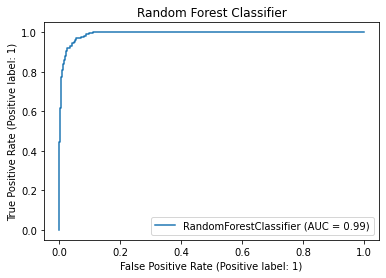

In [50]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('Random Forest Classifier')
plt.show()

The final accuracy is 99% which is pretty good.

### Saving the model

In [51]:
import pickle
filename='Wine_.pkl'
pickle.dump(lg, open(filename,'wb'))